In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
boston_housing = tf.keras.datasets.boston_housing

(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

In [3]:
num_train=len(train_x)
num_test=len(test_x)

In [4]:
x_train=(train_x-train_x.min(axis=0))/(train_x.max(axis=0)-train_x.min(axis=0))
y_train=train_y

x_test=(test_x-test_x.min(axis=0))/(test_x.max(axis=0) -test_x.min(axis=0))
y_test=test_y

In [5]:
x0_train = np.ones(num_train).reshape(-1,1)
x0_test = np.ones(num_test).reshape(-1,1)

In [6]:
X_train=tf.cast(tf.concat([x0_train,x_train],axis=1),tf.float32)
X_test=tf.cast(tf.concat([x0_test,x_test],axis=1),tf.float32)

In [7]:
X_train.shape,X_test.shape

(TensorShape([404, 14]), TensorShape([102, 14]))

In [8]:
Y_train = tf.constant(y_train.reshape(-1,1), tf.float32)
Y_test = tf.constant(y_test.reshape(-1,1), tf.float32)

In [9]:
Y_train.shape, Y_test.shape

(TensorShape([404, 1]), TensorShape([102, 1]))

In [10]:
learn_rate = 0.01
iter = 2000
display_step = 200

In [11]:
np.random.seed(612)
W = tf.Variable(np.random.randn(14,1),dtype=tf.float32)

In [12]:
mse_train=[]
mse_test=[]

for i in range(0, iter+1):
    with tf.GradientTape() as tape:
        PRED_train=tf.matmul(X_train,W)
        Loss_train=0.5 * tf.reduce_mean(tf.square(Y_train - PRED_train))
        
        PRED_test = tf.matmul(X_test,W)
        Loss_test = 0.5 * tf.reduce_mean(tf.square(Y_test - PRED_test))
    mse_train.append(Loss_train)
    mse_test.append(Loss_test)
    
    dL_dW = tape.gradient(Loss_train,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step == 0:
        print("i: %i, Train Loss: %f, Test Loss: %f" % (i, Loss_train, Loss_test))

i: 0, Train Loss: 263.193451, Test Loss: 276.994110
i: 200, Train Loss: 36.176556, Test Loss: 37.562954
i: 400, Train Loss: 28.789461, Test Loss: 28.952513
i: 600, Train Loss: 25.520695, Test Loss: 25.333916
i: 800, Train Loss: 23.460524, Test Loss: 23.340532
i: 1000, Train Loss: 21.887278, Test Loss: 22.039745
i: 1200, Train Loss: 20.596283, Test Loss: 21.124847
i: 1400, Train Loss: 19.510204, Test Loss: 20.467237
i: 1600, Train Loss: 18.587009, Test Loss: 19.997719
i: 1800, Train Loss: 17.797461, Test Loss: 19.671591
i: 2000, Train Loss: 17.118925, Test Loss: 19.456861


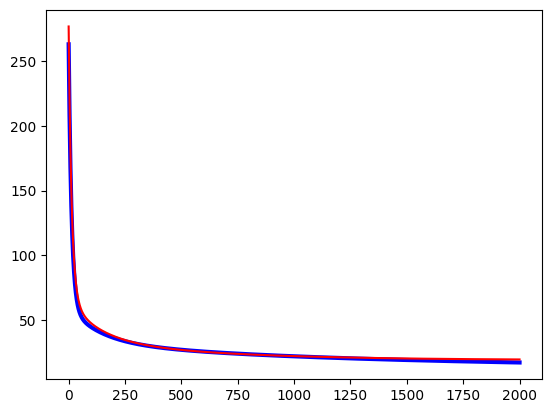

In [14]:
plt.plot(mse_train,color="blue", linewidth=3)
plt.plot(mse_test,color="red", linewidth=1.5)

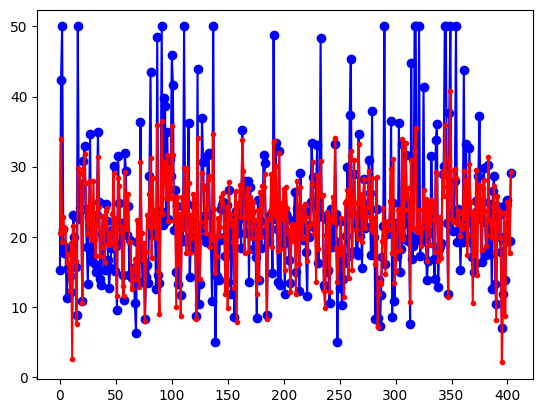

In [15]:
plt.plot(y_train,color="blue",marker="o",label="true_price")
plt.plot(PRED_train,color="red",marker=".",label="preidct")

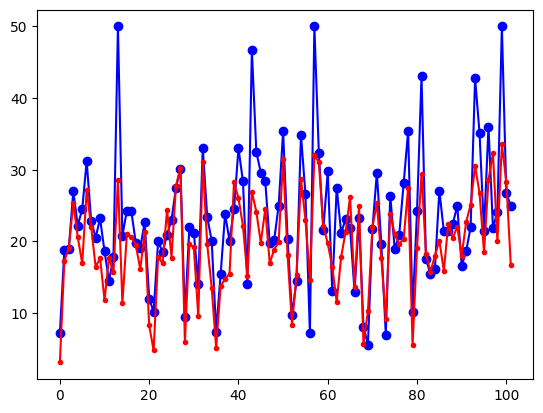

In [16]:
plt.plot(y_test,color="blue",marker="o",label="true_price")
plt.plot(PRED_test,color="red",marker=".",label="preidct")

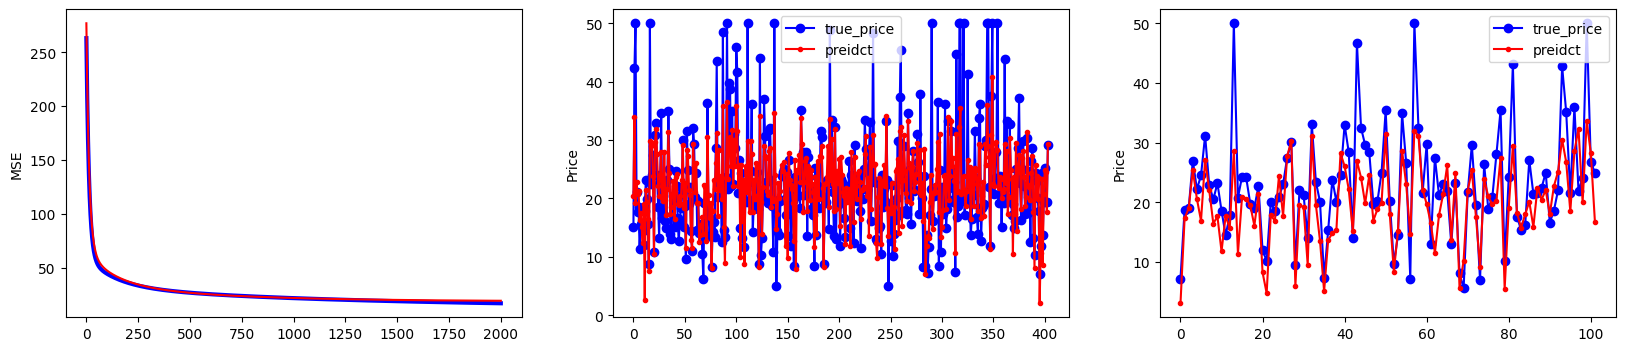

In [17]:
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.ylabel("MSE")
plt.plot(mse_train,color="blue",linewidth=3)
plt.plot(mse_test,color="red",linewidth=1.5)

plt.subplot(132)
plt.plot(y_train,color="blue",marker="o",label="true_price")
plt.plot(PRED_train,color="red",marker=".",label="preidct")
plt.legend()
plt.ylabel("Price")

plt.subplot(133)
plt.plot(y_test,color="blue",marker="o",label="true_price")
plt.plot(PRED_test,color="red",marker=".",label="preidct")
plt.legend()
plt.ylabel("Price")

plt.show()